# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#loading the data to a dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
#print first 5 rows of dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# adding the target columns in the dataframe
data_frame['diagnosis'] = breast_cancer_dataset.target

In [7]:
#print last 5 rows of dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
from scipy.sparse import data
# number of rows and columns
data_frame.shape

(569, 31)

In [9]:
#getting information about data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
#checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [11]:
# analyzing the data
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# checking the distribution of target variable
data_frame['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

# 1--> Malignant  0-->Benign

# Splitting The Features and Target

In [13]:
X = data_frame.drop(columns='diagnosis', axis=1)
Y = data_frame['diagnosis']

In [14]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [15]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int32


# Splitting the Data into Training Data and Testing Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [18]:
print(X_train)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
23        21.160         23.04          137.20     1404.0          0.09428   
316       12.180         14.08           77.25      461.4          0.07734   
251       11.500         18.45           73.28      407.4          0.09345   
391        8.734         16.84           55.27      234.3          0.10390   
444       18.030         16.85          117.50      990.0          0.08947   
..           ...           ...             ...        ...              ...   
71         8.888         14.64           58.79      244.0          0.09783   
233       20.510         27.81          134.40     1319.0          0.09159   
346       12.060         18.90           76.66      445.3          0.08386   
17        16.130         20.68          108.10      798.8          0.11700   
75        16.070         19.65          104.10      817.7          0.09168   

     mean compactness  mean concavity  mean concave points  mea

# Training Model 1: Logistics Regression Model

In [19]:
logreg = LogisticRegression()

In [20]:
logreg.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation And Accuracy Score

In [21]:
# accuracy on training data
X_train_prediction = logreg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
print("accuracy on training data : ", training_data_accuracy * 100)

accuracy on training data :  94.28571428571428


In [23]:
# accuracy on testing data
X_test_prediction = logreg.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction, Y_test)


In [24]:
print("accuracy on test data : ", test_data_accuracy1 * 100)

accuracy on test data :  96.49122807017544


In [25]:
cr1 = logreg.predict(X_test)
print(classification_report(Y_test, cr1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Training Model 2: Support Vector Machine

In [26]:
suvmac = svm.SVC(kernel="linear")

In [27]:
suvmac.fit(X_train, Y_train)

SVC(kernel='linear')

# Model Evaluation And Accuracy Score

In [28]:
# accuracy score in training data
X_train_prediction = suvmac.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [29]:
print('Accuracy score of training data : ', training_data_accuracy * 100)

Accuracy score of training data :  96.26373626373626


In [30]:
# accuracy score in test data
X_test_prediction = suvmac.predict(X_test)
test_data_accuracy2 = accuracy_score(Y_test, X_test_prediction)

In [31]:
print('Accuracy score of test data : ', test_data_accuracy2 * 100)

Accuracy score of test data :  97.36842105263158


In [32]:
cr2 = suvmac.predict(X_test)
print(classification_report(Y_test, cr2))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Training Model 3: Random Forest Classifier

In [33]:
ranfor =  RandomForestClassifier()

In [34]:
ranfor.fit(X_train, Y_train)

RandomForestClassifier()

# Model Evaluation And Accuracy Score

In [35]:
# accuracy on training data
X_train_prediction = ranfor.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [36]:
print('Accuracy score of training data : ', training_data_accuracy * 100)

Accuracy score of training data :  100.0


In [37]:
# accuracy score in testing data
X_test_prediction = ranfor.predict(X_test)
test_data_accuracy3 = accuracy_score(Y_test, X_test_prediction)

In [38]:
print('Accuracy score of test data : ', test_data_accuracy3 * 100)

Accuracy score of test data :  98.24561403508771


In [39]:
cr3 = ranfor.predict(X_test)
print(classification_report(Y_test, cr3))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [40]:
confusion_matrix(X_test_prediction, Y_test)

array([[40,  0],
       [ 2, 72]], dtype=int64)

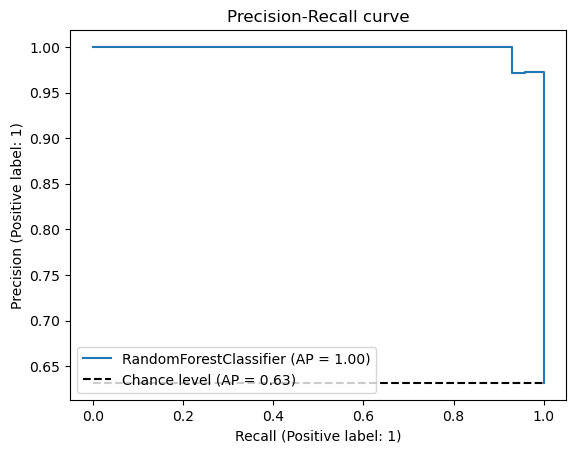

In [41]:
display = PrecisionRecallDisplay.from_estimator(
    ranfor, X_test, Y_test, name="RandomForestClassifier", plot_chance_level=True
)
_ = display.ax_.set_title("Precision-Recall curve")

# Training Model 4: Naive Bayes Algorithm

In [42]:
nabay =  MultinomialNB()

In [43]:
nabay.fit(X_train, Y_train)

MultinomialNB()

# Model Evaluation And Accuracy Score

In [44]:
# accuracy on training data
X_train_prediction = nabay.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [45]:
print('Accuracy score of training data : ', training_data_accuracy * 100)

Accuracy score of training data :  90.10989010989012


In [46]:
# accuracy score in testing data
X_test_prediction = nabay.predict(X_test)
test_data_accuracy4 = accuracy_score(Y_test, X_test_prediction)

In [47]:
print('Accuracy score of test data : ', test_data_accuracy4 * 100)

Accuracy score of test data :  87.71929824561403


In [48]:
cr4 = nabay.predict(X_test)
print(classification_report(Y_test, cr4))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        42
           1       0.85      0.97      0.91        72

    accuracy                           0.88       114
   macro avg       0.90      0.84      0.86       114
weighted avg       0.88      0.88      0.87       114



In [49]:
# comparing accuracies of all the algorithms for breast cancer prediction

models_names = [logreg, suvmac, ranfor, nabay]

models_accuracy = [test_data_accuracy1, test_data_accuracy2, test_data_accuracy3, test_data_accuracy4]

for i in range(4):
    print(f'{models_names[i]}')
    print('Accuracy of the model: ')
    print(f'{models_accuracy[i]}')
    print()

LogisticRegression()
Accuracy of the model: 
0.9649122807017544

SVC(kernel='linear')
Accuracy of the model: 
0.9736842105263158

RandomForestClassifier()
Accuracy of the model: 
0.9824561403508771

MultinomialNB()
Accuracy of the model: 
0.8771929824561403



# Comparing the Models Performances by Accuracy Score

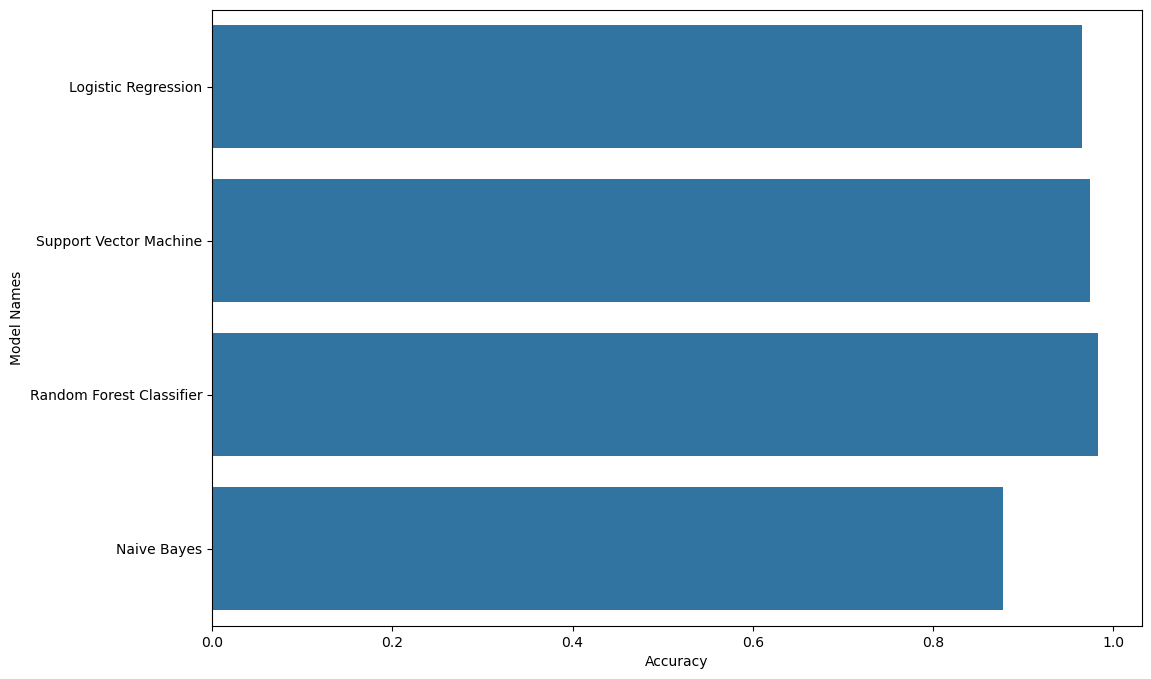

In [51]:
data = [['Logistic Regression', test_data_accuracy1], ['Support Vector Machine', test_data_accuracy2], ['Random Forest Classifier', test_data_accuracy3],
        ['Naive Bayes', test_data_accuracy4]]
df = pd.DataFrame(data, columns=['Model Names', 'Accuracy'])
plt.figure(figsize=(12, 8))
sns.barplot(x='Accuracy', y='Model Names', data=df)
plt.show()

# Saving the Trained Model

In [52]:
import pickle

In [53]:
filename = 'breast_cancer_model.sav'
pickle.dump(suvmac, open(filename, 'wb'))

In [54]:
# Loading the Saved Model

In [55]:
loaded_ranfor = pickle.load(open('breast_cancer_model.sav', 'rb'))

In [56]:
# Predictive System for Breast Cancer

input_data = (18.61,20.25,122.1,1094,0.0944,0.1066,0.149,0.07731,0.1697,0.05699,0.8529,1.849,5.632,93.54,0.01075,0.02722,0.05081,0.01911,0.02293,0.004217,21.31,27.26,139.9,1403,0.1338,0.2117,0.3446,0.149,0.2341,0.07421)

#change the input array into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for only one instance.
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction2 = loaded_ranfor.predict(input_data_reshaped)
print(prediction2)
if(prediction2[0] == 1):
  print("The breast cancer is Benign")
else:
    print("The Breast cancer is Malignant")

[0]
The Breast cancer is Malignant
